In [ ]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/home_credit/application_train.csv")
#df1=pd.read_csv(r"/content/drive/MyDrive/home_credit/previous_application.csv")

In [ ]:
#new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Cleaning the missing data
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

**Drop Missing Value**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
# Creating Age Column
df['Age'] = (df['DAYS_REGISTRATION']-df['DAYS_BIRTH'])/365

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,41.273973
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42.520548
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,30.671233
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,37.008219
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,30.194521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,36.164384
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,31.813699
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,5.805479
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,40.454795


In [ ]:
#mengecek apakah dataset memiliki data duplikat
df[df.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age


In [ ]:
df.shape

(8602, 121)

In [ ]:
df.TARGET.value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

In [ ]:
print(df.TARGET.value_counts(normalize=True)*100)
print('\n')

0    93.885143
1     6.114857
Name: TARGET, dtype: float64




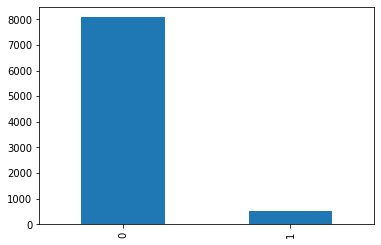

In [ ]:
df.TARGET.value_counts().plot(kind='bar')

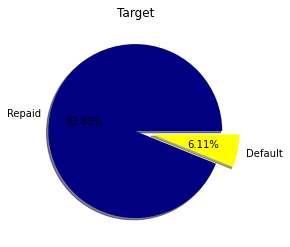

In [ ]:
label = ('Repaid', 'Default')
color = ('navy','yellow')
explode = (0, 0.2)

plt.title('Target')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

Perbedaan proporsi label yang signifikan pada kasus klasifikasi dapat menyebabkan komputer/mesin tidak dapat belajar dengan baik sehingga model yang terbentuk hanya dapat mengenali label yang dominan.Ada perbedaan yang signifikan dalam proporsi label dalam dataset ini

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


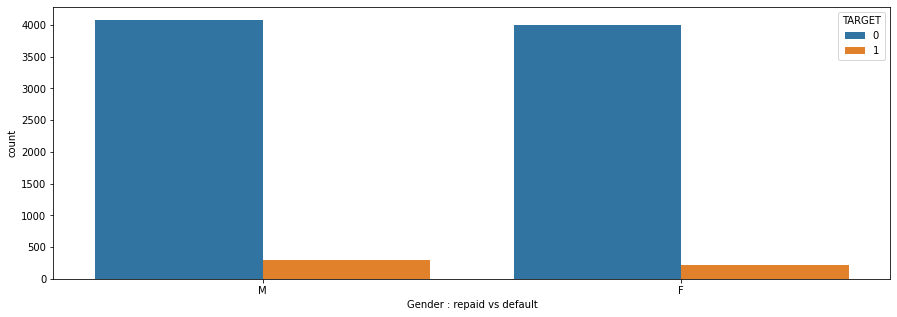

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot('CODE_GENDER',hue='TARGET',data=df)
plt.xlabel('Gender : repaid vs default')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


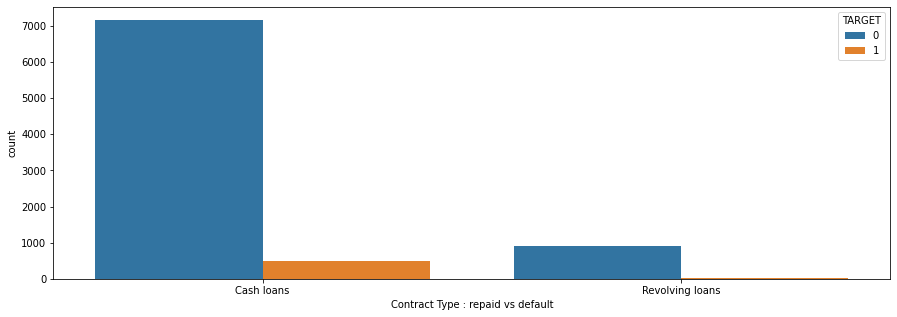

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot('NAME_CONTRACT_TYPE',hue='TARGET',data=df)
plt.xlabel('Contract Type : repaid vs default')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfd20b22d0>,
      dtype=object)

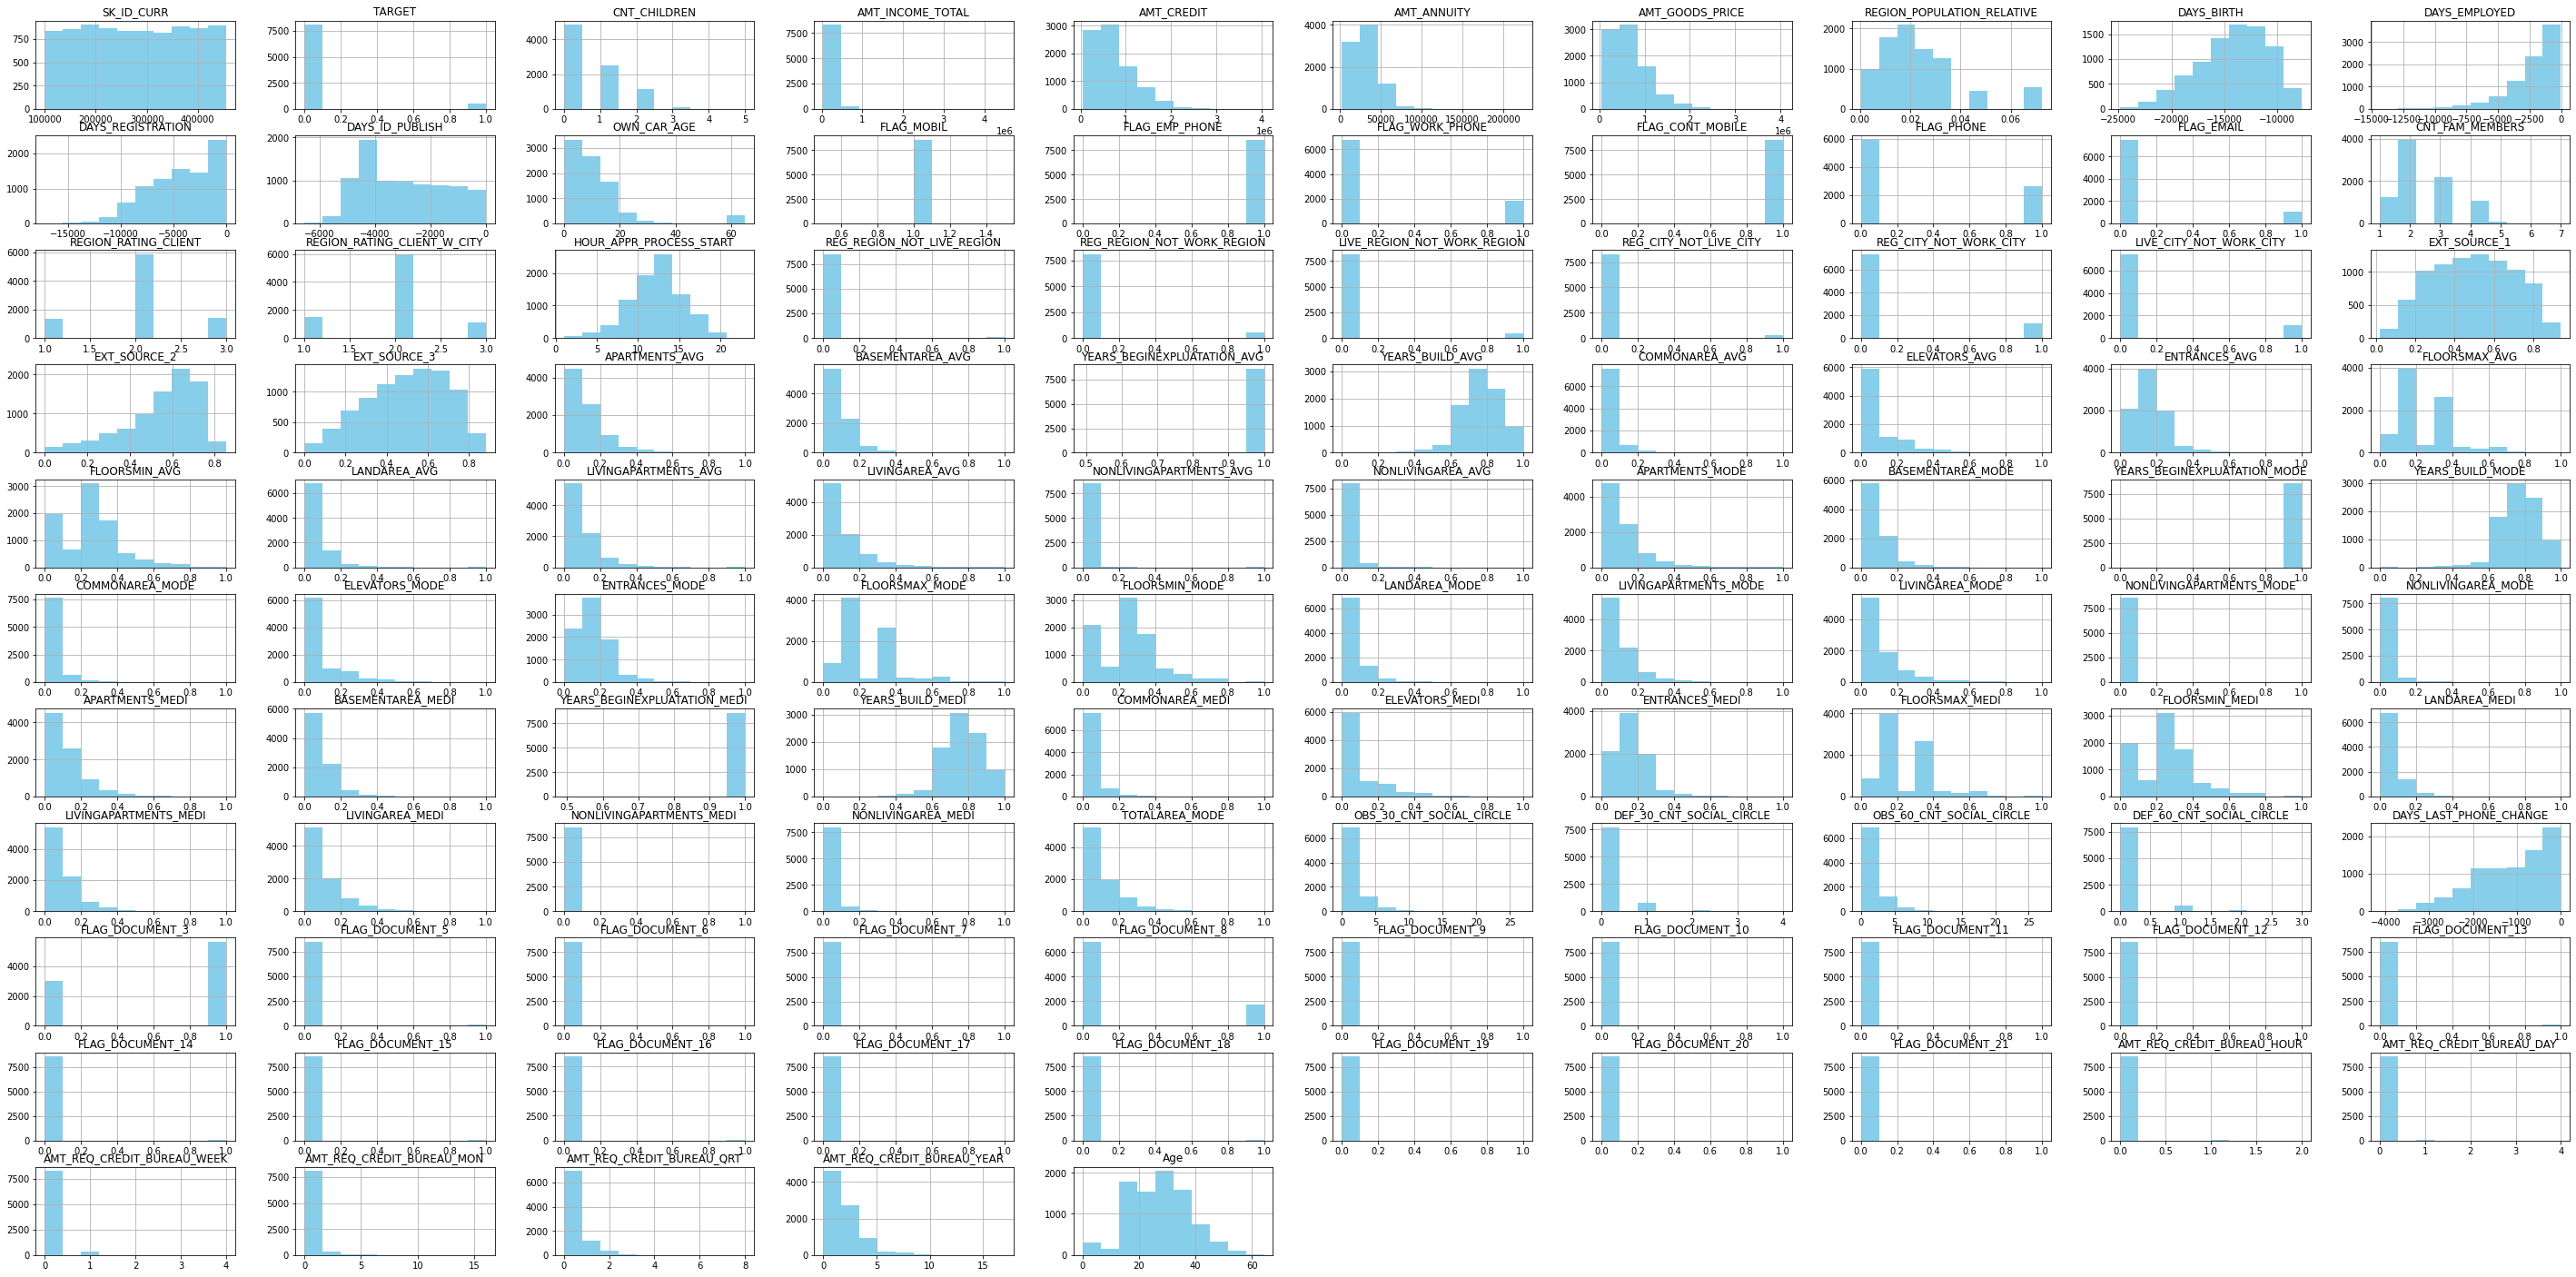

In [ ]:
df.hist(figsize=(50,25),color='skyblue')

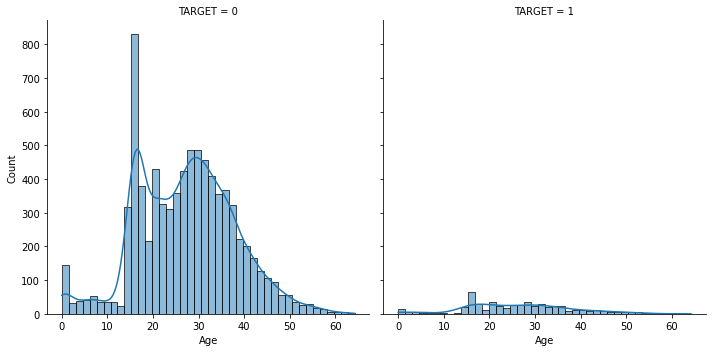

In [ ]:
sns.displot(data=df, x="Age", col='TARGET', kde=True)
plt.show()

**Correlation**

In [ ]:
# heatmap

#plt.figure(figsize = (100, 60))

#corr = df.corr()

#sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
#plt.show()

In [ ]:
df.corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_EMPLOYED                  0.062950
REGION_RATING_CLIENT_W_CITY    0.061214
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT           0.053614
                                 ...   
FLOORSMAX_AVG                 -0.046110
EXT_SOURCE_1                  -0.129548
EXT_SOURCE_2                  -0.130969
EXT_SOURCE_3                  -0.150720
FLAG_MOBIL                          NaN
Name: TARGET, Length: 105, dtype: float64

In [ ]:
#checking number of unique values
df.nunique()

SK_ID_CURR                    8602
TARGET                           2
NAME_CONTRACT_TYPE               2
CODE_GENDER                      2
FLAG_OWN_CAR                     1
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK       5
AMT_REQ_CREDIT_BUREAU_MON       17
AMT_REQ_CREDIT_BUREAU_QRT        8
AMT_REQ_CREDIT_BUREAU_YEAR      13
Age                           6069
Length: 121, dtype: int64

In [ ]:
# dropping columns which are not necessary for prediction

to_drop = ['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
           'HOUR_APPR_PROCESS_START']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
#Separating the feature and target columns
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

**Encoding Categorical Columns**

In [ ]:
encoding = {"NAME_CONTRACT_TYPE": {"Cash loans": 0, "Revolving loans": 1}, "CODE_GENDER": {"F": 0, "M": 1}, "FLAG_OWN_CAR": {"N": 0, "Y": 1},
            "FLAG_OWN_REALTY": {"N": 0, "Y": 1}}
new_df1.replace(encoding, inplace=True)

In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         89.049058
Revolving loans    10.950942
Name: NAME_CONTRACT_TYPE, dtype: float64


M    50.930016
F    49.069984
Name: CODE_GENDER, dtype: float64


Y    100.0
Name: FLAG_OWN_CAR, dtype: float64


Y    68.774704
N    31.225296
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      83.399209
Family             11.415950
Spouse, partner     3.673564
Children            0.732388
Other_B             0.465008
Other_A             0.220879
Group of people     0.093002
Name: NAME_TYPE_SUITE, dtype: float64


Working                 58.707277
Commercial associate    32.969077
State servant            8.323646
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    54.010695
Higher education                 40.955592
Incomplete higher                 4.557080
Lower secondary                   0.406882
Academic degree                   0.069751
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 71.367124
Single / not married    13.473611
Ci

In [ ]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [ ]:
cat_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
71,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
124,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,Laborers,Self-employed,reg oper spec account,block of flats,Panel,No
152,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Managers,Trade: type 7,reg oper account,block of flats,Monolithic,No
161,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Government,reg oper account,block of flats,Panel,No
255,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,reg oper account,block of flats,Panel,No


**Printing Unique Values of Each Columns**

In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

NAME_CONTRACT_TYPE: 
['Cash loans' 'Revolving loans']

CODE_GENDER: 
['M' 'F']

FLAG_OWN_CAR: 
['Y']

FLAG_OWN_REALTY: 
['Y' 'N']

NAME_TYPE_SUITE: 
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

NAME_INCOME_TYPE: 
['Working' 'Commercial associate' 'State servant']

NAME_EDUCATION_TYPE: 
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS: 
['Married' 'Separated' 'Single / not married' 'Widow' 'Civil marriage']

NAME_HOUSING_TYPE: 
['House / apartment' 'With parents' 'Municipal apartment'
 'Office apartment' 'Co-op apartment' 'Rented apartment']

OCCUPATION_TYPE: 
['Laborers' 'Managers' 'Drivers' 'Core staff' 'Sales staff'
 'High skill tech staff' 'Medicine staff' 'Accountants'
 'Private service staff' 'Cooking staff' 'HR staff' 'Cleaning staff'
 'Security staff' 'Secretaries' 'IT staff' 'Realty agents'
 'Waiters/barmen staff' 'Low-skill Laborers']

ORGANIZATIO

**Get Dummies from Categorical Columns**

In [ ]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [ ]:
cat_df.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_State servant,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
71,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
124,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
152,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
161,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
255,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


**Extracting the Numerical Columns**

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 113 entries, NAME_CONTRACT_TYPE to Age
dtypes: float64(65), int64(33), object(15)
memory usage: 7.7+ MB


In [ ]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64','float64'])

In [ ]:
num_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
71,0,103500.0,573628.5,24435.0,463500.0,0.009657,22.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,41.273973
124,1,202500.0,260725.5,16789.5,198000.0,0.018850,8.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42.520548
152,0,202500.0,675000.0,53329.5,675000.0,0.031329,4.0,1,1,0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,30.671233
161,0,162000.0,263686.5,24781.5,238500.0,0.022625,3.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,37.008219
255,1,225000.0,1019205.0,31032.0,774000.0,0.072508,9.0,1,1,0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,30.194521


**Combining Numerical and Categorical Columns**

In [ ]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
71,0,103500.0,573628.5,24435.0,463500.0,0.009657,22.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
124,1,202500.0,260725.5,16789.5,198000.0,0.018850,8.0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
152,0,202500.0,675000.0,53329.5,675000.0,0.031329,4.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
161,0,162000.0,263686.5,24781.5,238500.0,0.022625,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
255,1,225000.0,1019205.0,31032.0,774000.0,0.072508,9.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

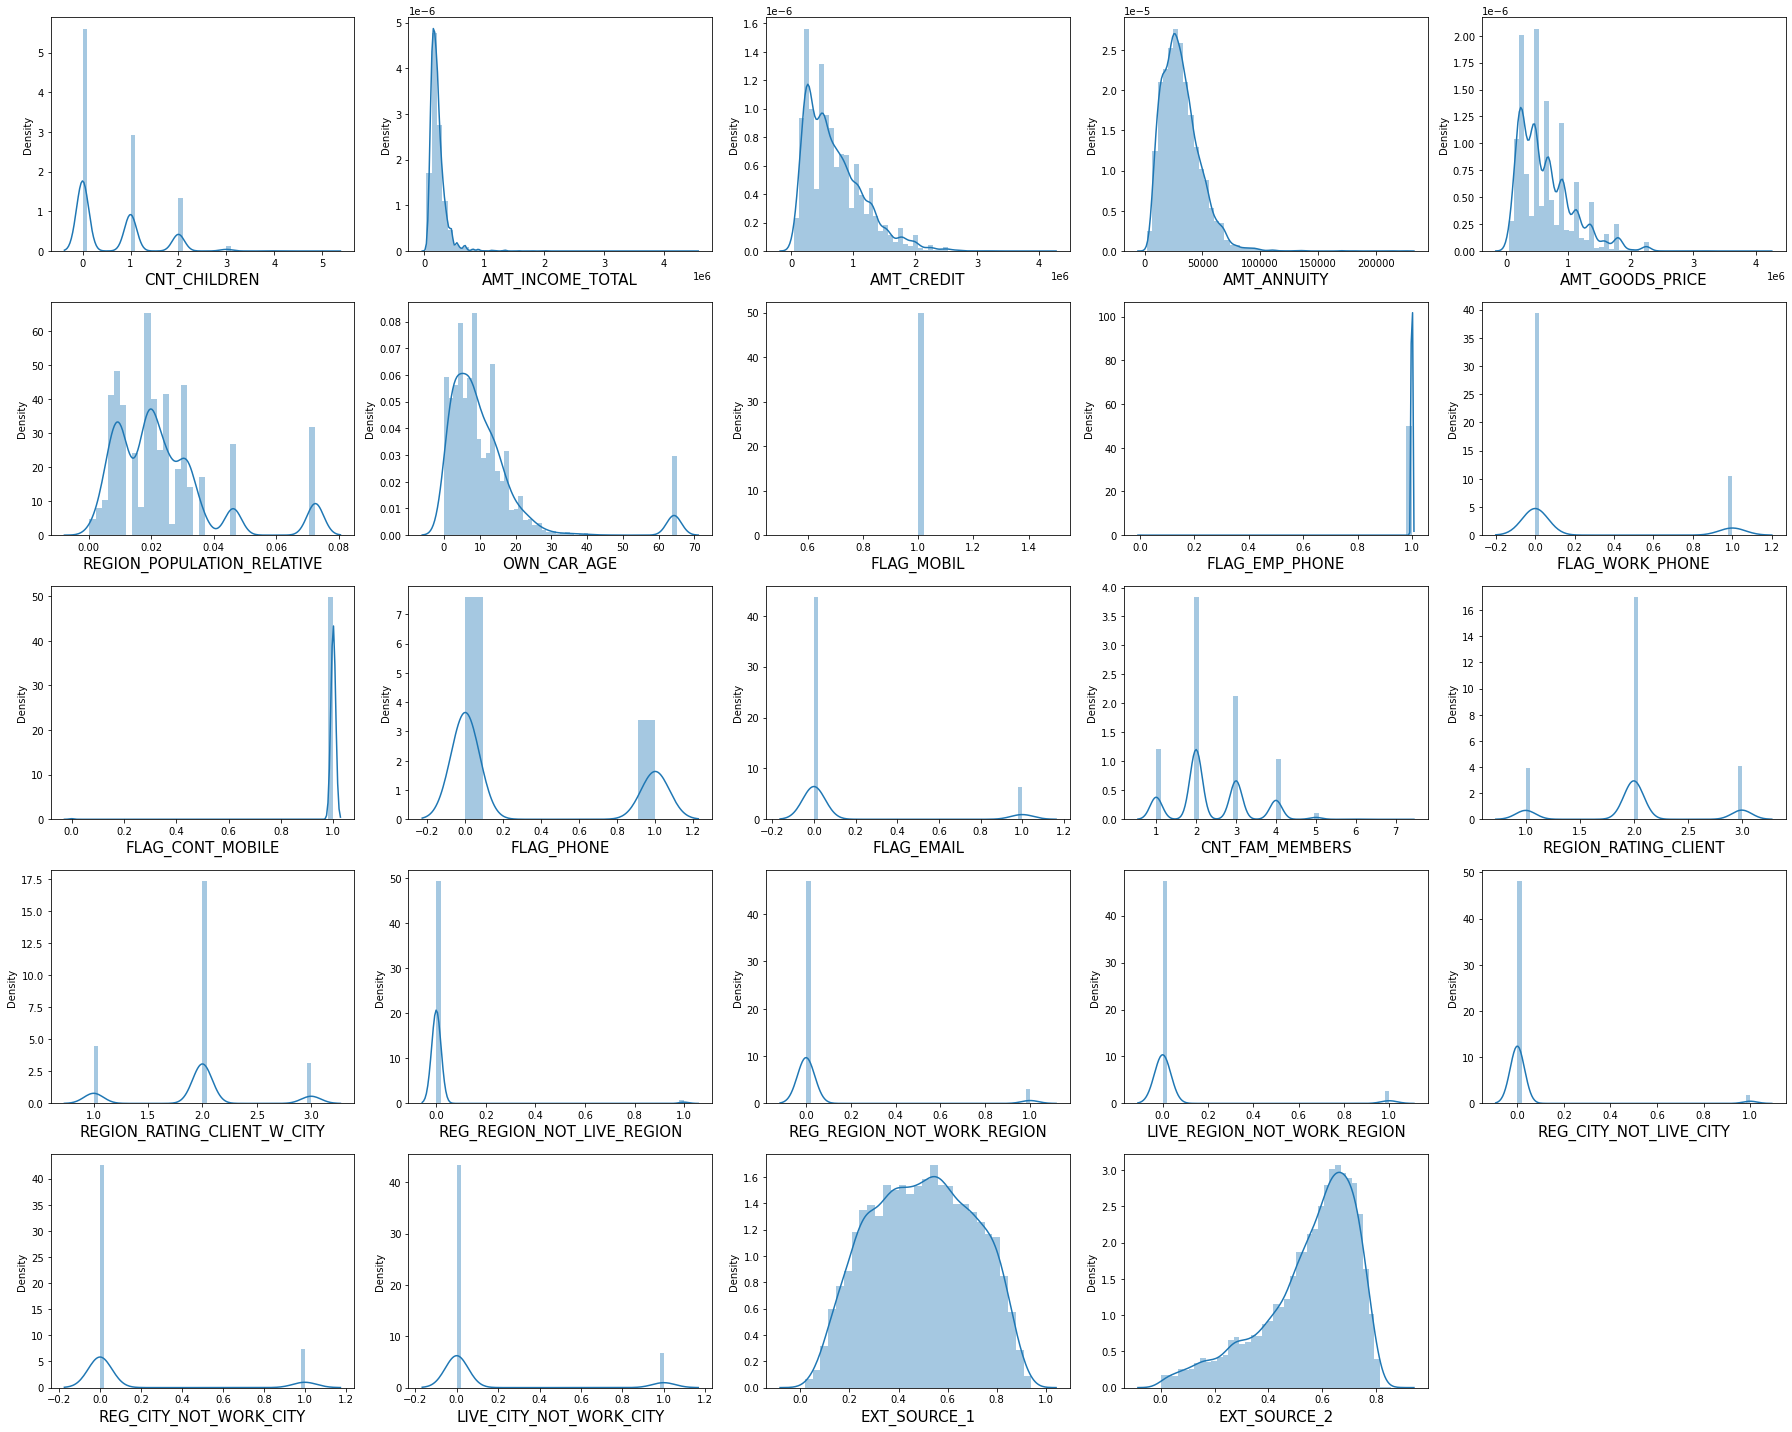

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Outlier Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

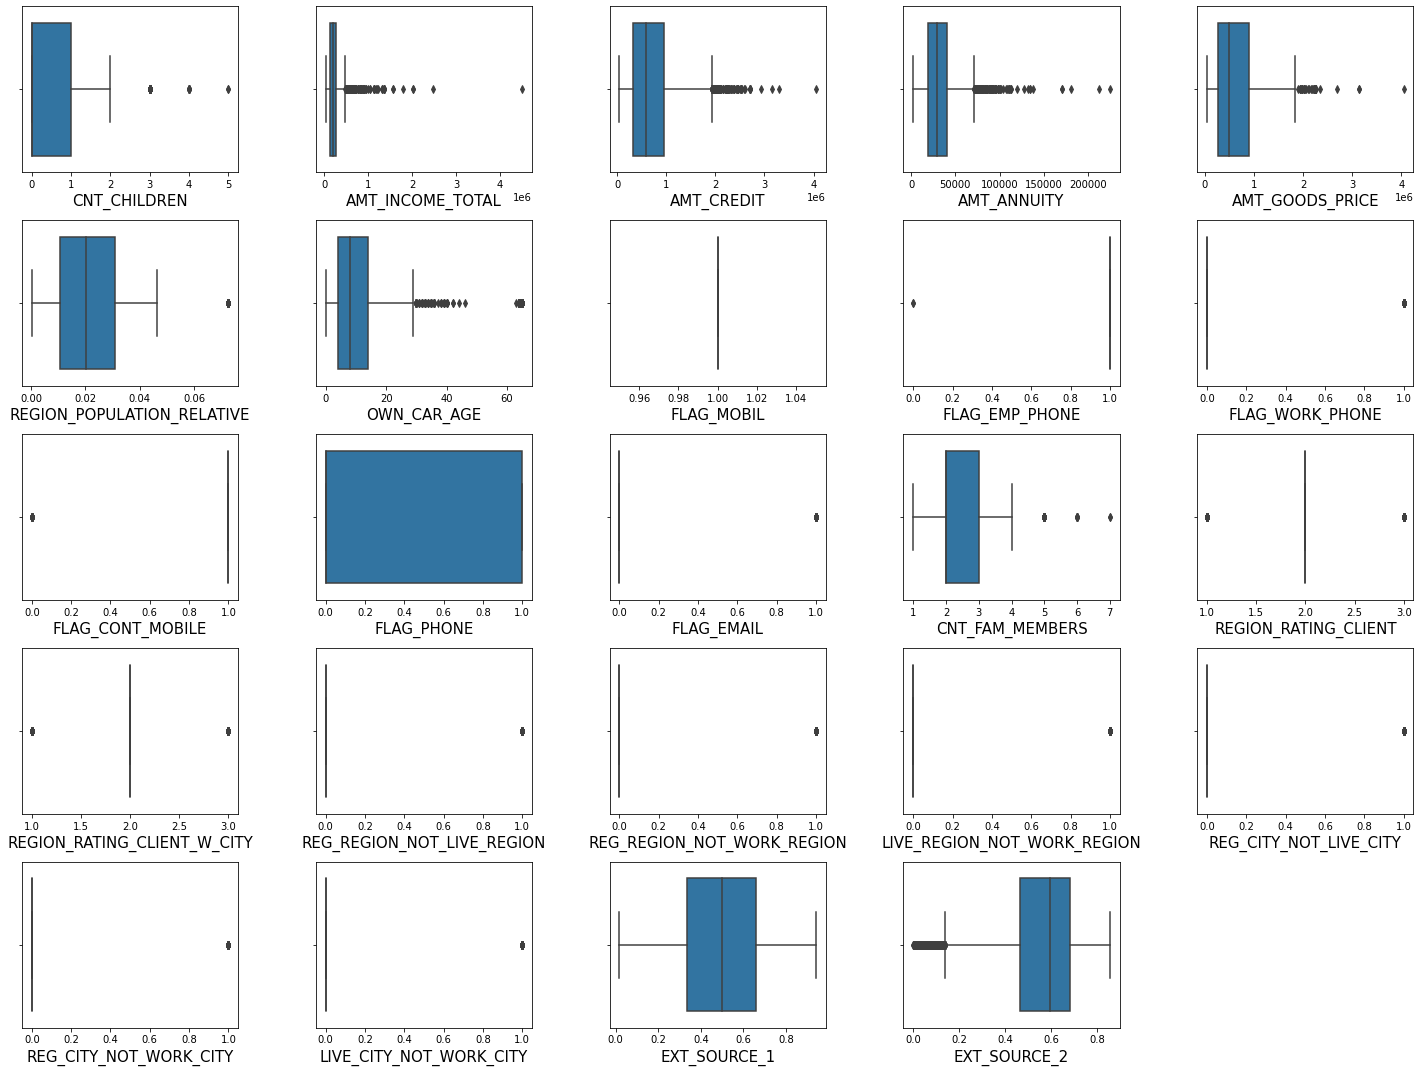

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

In [ ]:
X.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       ...
       'FONDKAPREMONT_MODE_reg oper spec account',
       'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=205)

Handling Outliers

In [ ]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'REGION_POPULATION_RELATIVE','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_2']
for i in X[outlier_list]:
    X[i]=treat_outlier(X[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

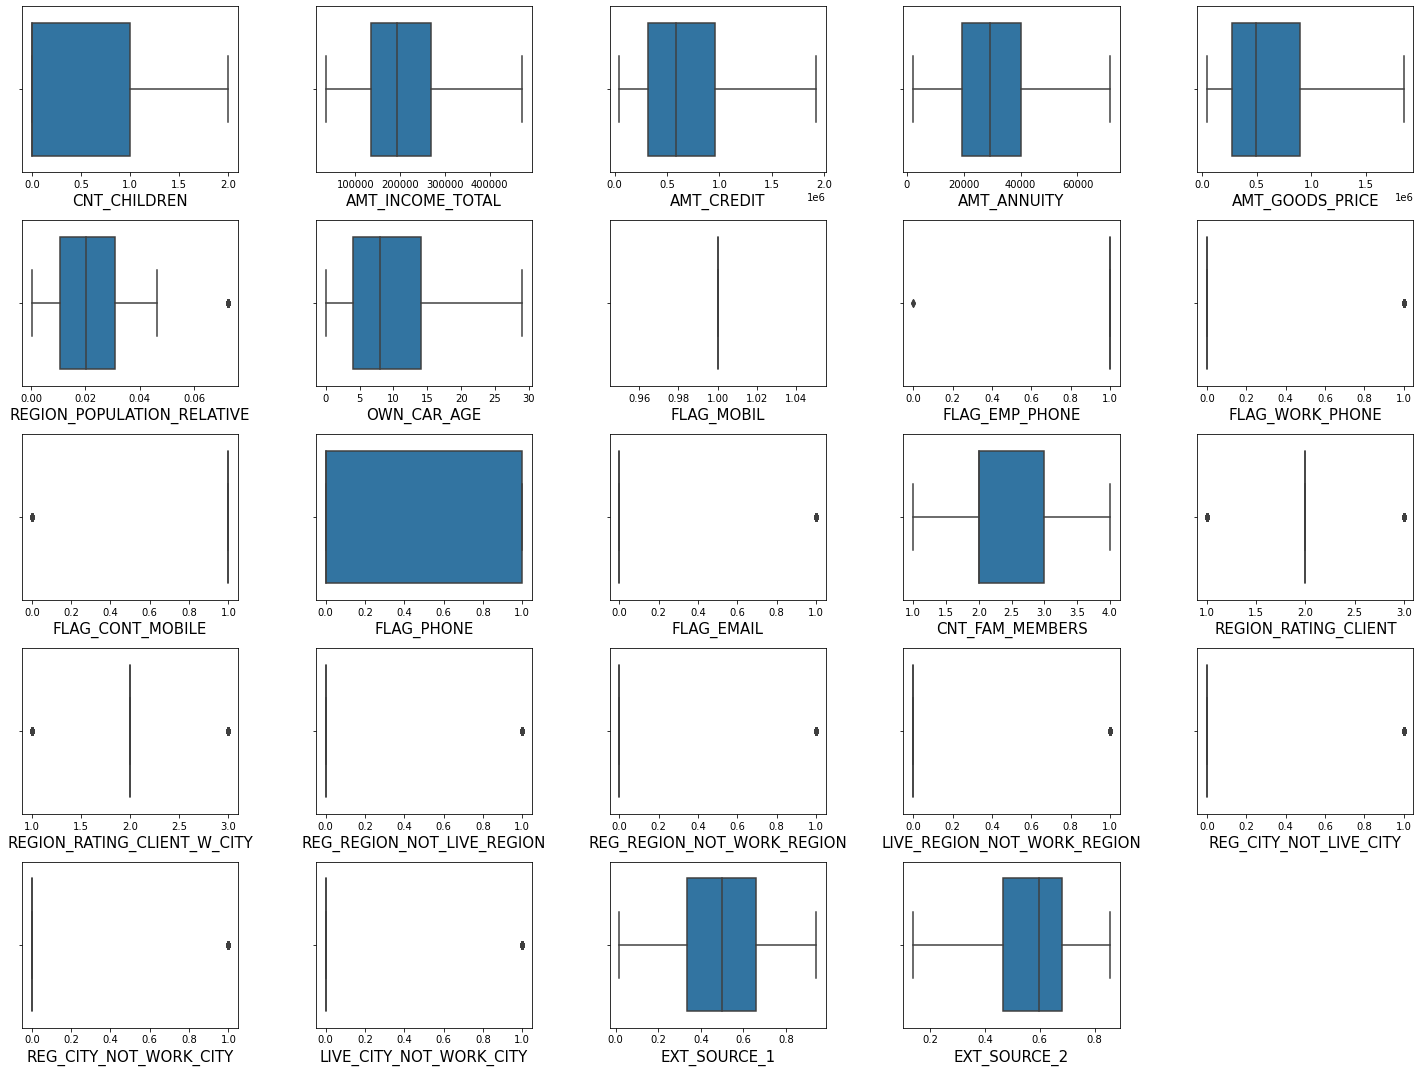

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
#from sklearn.model_selection import train_test_split

#training_data, testing_data = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
#training_data.to_csv('data_train.csv', index = False)
#testing_data.to_csv('data_test.csv', index = False)

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X.to_csv('data_prepro.csv', index = False)
#X_test.to_csv('data_test.csv', index = False)

In [ ]:
X_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
67729,1.0,229500.0,679500.0,19998.0,679500.0,0.025164,11.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
46210,0.0,450000.0,1223010.0,51817.5,1125000.0,0.020246,10.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
237138,1.0,157500.0,1006920.0,39933.0,900000.0,0.035792,4.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
162450,1.0,306000.0,260640.0,27499.5,225000.0,0.006305,25.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
28278,0.0,270000.0,814041.0,23800.5,679500.0,0.030755,6.0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73623,0.0,450000.0,1078200.0,34911.0,900000.0,0.011703,15.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
240019,0.0,240750.0,1303200.0,46939.5,1125000.0,0.018850,6.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
229730,1.0,450000.0,848745.0,46174.5,675000.0,0.009549,9.0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
18600,2.0,135000.0,168102.0,11362.5,148500.0,0.008474,28.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_test

67729     1
46210     0
237138    0
162450    0
28278     0
         ..
73623     0
240019    0
229730    0
18600     0
23186     0
Name: TARGET, Length: 1721, dtype: int64

**Normalization**

In [ ]:
num_df = X_train.select_dtypes(include = ['int64','float64'])

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_df)

In [ ]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
288453,1.0,0.384615,0.406890,0.398566,0.3500,0.215296,0.137931,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.235294,0.278880
100223,0.5,0.435897,0.075062,0.103877,0.0450,1.000000,0.103448,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.235294,0.545214
133303,0.0,0.261538,0.158934,0.361095,0.1475,0.266313,0.448276,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.117647,0.315111
146084,0.0,0.384615,0.130588,0.236755,0.1025,0.145735,0.137931,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.117647,0.534588
150986,0.0,0.179487,0.095908,0.283871,0.1000,0.299711,0.310345,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.252464


In [ ]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [ ]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [ ]:
X_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
288453,1.0,0.384615,0.406890,0.398566,0.3500,0.215296,0.137931,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
100223,0.5,0.435897,0.075062,0.103877,0.0450,1.000000,0.103448,0.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
133303,0.0,0.261538,0.158934,0.361095,0.1475,0.266313,0.448276,0.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
146084,0.0,0.384615,0.130588,0.236755,0.1025,0.145735,0.137931,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
150986,0.0,0.179487,0.095908,0.283871,0.1000,0.299711,0.310345,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


**Balancing the Dataset using oversampling (SMOTE)**

In [ ]:
from imblearn.over_sampling import SMOTE 

OS_SMOTE = SMOTE()

X_train, y_train = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  TARGET
0       0    6457
1       1    6457


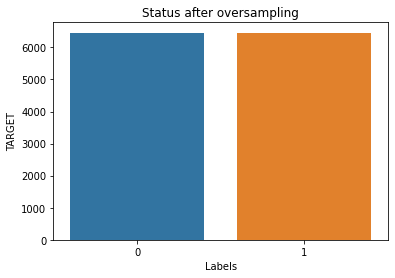

In [ ]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','TARGET']
print(oversample_plot)
sns.barplot(x='Labels',y='TARGET',data=oversample_plot);
plt.title('Status after oversampling');

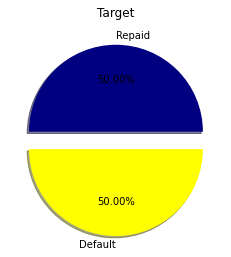

In [ ]:
label = ('Repaid', 'Default')
color = ('navy','yellow')
explode = (0, 0.2)

plt.title('Target')
plt.pie(
    y_train.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

**Reduce Overfitting using Principal Componen Analysis (PCA)**

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.ticker as mtick
# import matplotlib as mpl

# pca = PCA()
# pca.fit(X_train)

# cumsum = np.cumsum(pca.explained_variance_ratio_)*100
# d = [n for n in range(len(cumsum))]

# # Visualize
# fig, ax = plt.subplots(figsize =(10, 10))
# fig.patch.set_facecolor('white')
# mpl.rcParams['font.family'] = 'Ubuntu'
# mpl.rcParams['font.size'] = 14

# ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

# ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
# ax.legend(loc='best')

# # Remove ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')

# # Remove axes splines
# for i in ['top','right']:
#     ax.spines[i].set_visible(False)

# # Set percentages
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# # annotation arrow
# arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
# plt.annotate('Principal Component Number 19', 
#              xy=(19, 95), 
#              xytext=(19+5, 95+10), 
#              arrowprops=arrowprops,
#              size = 14)

# plt.legend(bbox_to_anchor = (1, 0.2))

# plt.suptitle('Explained Variance vs Dimensions', size=26)
# plt.ylabel('Cumulative Explained Variance')
# plt.xlabel('PC');

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(random_state=42)
clf1.fit(X_train, y_train)
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs_rfc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_rfc.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [ ]:
# Test data performance
from sklearn.metrics import *

print("Test Accuracy Score:",accuracy_score(gs_rfc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_rfc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_rfc.predict(X_test), y_test))

Test Accuracy Score: 0.9395700174317257
Test Precision: 0.0
Test Recall: 0.0


In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_rfc.predict(X_test)
rfc_train_acc = accuracy_score(y_train, gs_rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest Classifier is : 1.0
Test accuracy of Random Forest Classifier is : 0.9395700174317257
[[1617    2]
 [ 102    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1619
           1       0.00      0.00      0.00       102

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.48      1721
weighted avg       0.88      0.94      0.91      1721



In [ ]:
#X_train.columns.to_list()

In [ ]:
feature_imp = pd.Series(clf1.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp.head(25)
#print(feature_imp.iloc[61:90])

OBS_30_CNT_SOCIAL_CIRCLE       0.045388
OBS_60_CNT_SOCIAL_CIRCLE       0.039546
AMT_REQ_CREDIT_BUREAU_YEAR     0.038706
EXT_SOURCE_3                   0.037465
EXT_SOURCE_1                   0.035285
EXT_SOURCE_2                   0.025150
FLOORSMAX_AVG                  0.021213
FLOORSMIN_MODE                 0.021069
FLOORSMAX_MODE                 0.021039
FLOORSMIN_MEDI                 0.020020
FLOORSMIN_AVG                  0.019197
REGION_RATING_CLIENT           0.017218
DAYS_LAST_PHONE_CHANGE         0.017190
FLOORSMAX_MEDI                 0.015507
REGION_POPULATION_RELATIVE     0.015348
NONLIVINGAPARTMENTS_MODE       0.015268
OWN_CAR_AGE                    0.014805
CNT_CHILDREN                   0.014783
NONLIVINGAREA_MEDI             0.014599
NONLIVINGAPARTMENTS_MEDI       0.014316
AMT_INCOME_TOTAL               0.013838
NONLIVINGAPARTMENTS_AVG        0.013837
CNT_FAM_MEMBERS                0.013824
FLAG_PHONE                     0.013759
REGION_RATING_CLIENT_W_CITY    0.013653
